# Modelling the raw sensor data of TSL2561 to match human perception

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

## The model used in the datasheet of TSL2561

In [5]:
def TSL2561_Lux(ch0, ch1):
    if ch0 == 0:
        return 0
    if ch0 > 65000 or ch1 > 65000:
        return 10000.0  # overflow
    ratio = ch1 / ch0;
    if ratio <= 0.5:
        lux = 0.0304 * ch0 - 0.062 * ch0 * pow(ratio, 1.4)
    elif ratio <= 0.61:
        lux = 0.0224 * ch0 - 0.031 * ch1
    elif ratio <= 0.80:
        lux = 0.0128 * ch0 - 0.0153 * ch1
    elif ratio <= 1.30:
        lux = 0.00146 * ch0 - 0.00112 * ch1
    else:
        lux = 0
    return lux;

## Gathering data

The datasheet of the TSL2561 contains graphs for the normalized responsivity of channel 0 and 1 of the sensor in dependence of the wavelength:

<img src="./DatasheetTSL2561-NormalizedResponsivity-Ch0Ch1.png" width="400px" />

### The WebPlotDigitizer

Following an idea by [SimonMerrett](https://github.com/SimonMerrett/TSL2591_characteristics), we use the fabulous tool [WebPlotDigitizer](https://apps.automeris.io/wpd/) to transform the image data into digital approximations that we can use to refine our models.

In [6]:
ch0=[(300.7543772248505, 0.20921060405997338),
(307.52906236667894, 0.2467568863335453),
(312.7388908841993, 0.2742771636528426),
(317.6071586524133, 0.30494416733182783),
(323.09851320888026, 0.33361526304380584),
(329.12762069603707, 0.36640219135390484),
(335.40879378648424, 0.39627472411664066),
(342.00076223816933, 0.4244645309626116),
(349.11655097329276, 0.456846022926945),
(356.8225638138236, 0.4879583702370208),
(364.76209219497656, 0.5187423351568977),
(373.402167197996, 0.5502403433593315),
(376.73720356559784, 0.5637934482364431),
(385.3046725519058, 0.592441471607678),
(393.79243482582916, 0.6191267661317705),
(405.48481301813297, 0.654353397794728),
(416.1909031903219, 0.6846518853210473),
(429.2123814066889, 0.7165485621068752),
(442.05573614090696, 0.7462653426490913),
(453.7671378684441, 0.7719905394475988),
(462.25607526395515, 0.7925600590529488),
(473.7301365471826, 0.8141835178608501),
(488.1391299459929, 0.8405018716365185),
(504.60227633121235, 0.8689771425941442),
(519.2955085946751, 0.8919537756177827),
(533.8273436054104, 0.9123216706229784),
(557.178897667625, 0.9407025810386813),
(580.997482811084, 0.9646016412879871),
(595.598177753333, 0.9762019211123494),
(611.7933345798026, 0.9850061565809222),
(629.4974658676308, 0.9925197797667309),
(647.2763616236869, 0.9949709067808187),
(668.5065084582588, 0.9910234223057686),
(687.9632566173036, 0.9807987770268876),
(707.6740262916987, 0.9662339714339423),
(721.2251941328732, 0.9509467989179443),
(732.7825842154791, 0.9345476041941927),
(751.6973430058729, 0.9045972536243096),
(768.2769463900452, 0.8744719801459633),
(783.4245428743222, 0.844162845395678),
(795.9243175046727, 0.8147970802616877),
(806.2028528363842, 0.7901138685430174),
(815.5059260813616, 0.7639104743521311),
(825.9552849237155, 0.7350741938383838),
(836.2299687110899, 0.705136682245016),
(846.2711369578421, 0.6751788864963415),
(856.0787896639722, 0.6453637137146684),
(866.515662282178, 0.6106083622023039),
(875.116279878042, 0.5853664863195158),
(884.781638954225, 0.5560796101717131),
(893.9253676645792, 0.5261097328242277),
(902.3504914035871, 0.4966460252855367),
(911.3911553512166, 0.4681455135175856),
(920.1874331257768, 0.43779283620620946),
(929.8846546414338, 0.401503620268054),
(938.9724797223969, 0.36959915162759727),
(950.6525836159415, 0.329055131378882),
(957.6685489829438, 0.3032329928755494),
(963.4959383501596, 0.2858384707379067),
(973.8320296231714, 0.25237444172046797),
(984.7169222916361, 0.22177251543434173),
(996.9173247507658, 0.18495296221900526),
(1008.5111797599163, 0.1544499859085019),
(1027.7127120212497, 0.11055649238084098),
(1042.2052702611115, 0.07936364543637009),
(1052.5452976704055, 0.06474301172227237),
(1064.9485570694603, 0.048886013377342774),
(1082.0152304266187, 0.03343217287677802),
(1099.4169714316001, 0.017462862217669572)]

In [7]:
ch0_x, ch0_y = [c[0] for c in ch0], [c[1] for c in ch0]

In [8]:
ch1=[(299.7168995160546, 0.0028357908223006767),
(335.80616515783043, 0.0026501107391052603),
(359.6247503012894, 0.002431906921355864),
(383.4433354447483, 0.0022883517780996065),
(406.7354491875318, 0.00199402209432753),
(431.0805057316661, 0.0017715532623767682),
(454.899090875125, 0.0018174909082189217),
(478.7176760185839, 0.002202218692145763),
(504.01169147920564, 0.003988864989358021),
(526.3548463055017, 0.011693439896091284),
(548.109658968327, 0.031009937588810876),
(568.1541280768658, 0.05842456515458794),
(585.3796166861655, 0.0861729726744479),
(602.6788033925138, 0.11894000508065028),
(614.2186707585829, 0.14321969294529702),
(626.0659821511582, 0.16956182651223783),
(638.0585131962764, 0.19860571935227456),
(651.5892307411588, 0.23132220976407436),
(663.1949531100795, 0.2617074253770988),
(674.8707301411868, 0.2922109409691104),
(686.7534226762805, 0.3233920121122197),
(699.3898619065121, 0.3552722983336013),
(715.5270147926635, 0.3909954802935305),
(738.6014727048641, 0.42628811340056905),
(760.3374180088922, 0.4521212642745226),
(784.1560031523511, 0.47040570793410996),
(805.1891872806091, 0.47493182666401523),
(831.7931734392689, 0.4677917437123783),
(855.6117585827278, 0.446918825882915),
(874.5067500110783, 0.4212453829338193),
(896.3499264287266, 0.38464213396933844),
(914.1062067779026, 0.34798027127675524),
(929.169153878704, 0.31169959851442597),
(941.0784464504334, 0.28160968074992054),
(952.3228170967263, 0.2523990748585455),
(959.7596897002052, 0.2328321696419573),
(970.1649433753623, 0.2044933503151849),
(983.0111656735817, 0.17213191516601245),
(994.7870207935271, 0.14225875084109962),
(1012.1401960919266, 0.10110055445999921),
(1027.942317534215, 0.07022293827063597),
(1043.9243383581534, 0.0493286190093557),
(1064.723078807911, 0.031441656143522234),
(1082.4487547430808, 0.018860448033655608),
(1099.4019829922486, 0.008927183646930681)]

In [9]:
ch1_x, ch1_y = np.array([c[0] for c in ch1]), np.array([c[1] for c in ch1])

Text(0.5, 1.0, 'Spectral Responsivity TSP2561 two channels')

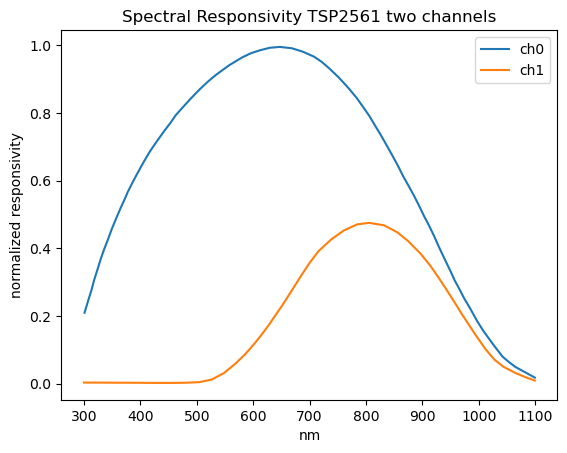

In [10]:
plt.plot(ch0_x, ch0_y, label='ch0')
plt.plot(ch1_x, ch1_y, label='ch1')
plt.legend(loc="upper right")
plt.xlabel('nm')
plt.ylabel('normalized responsivity')
plt.title('Spectral Responsivity TSP2561 two channels')

In [11]:
x=np.linspace(300,1100,1000)

In [12]:
ch0i=np.interp(x,ch0_x,ch0_y)

In [13]:
ch1i=np.interp(x,ch1_x,ch1_y)

In [93]:
cr=ch1i/ch0i
# cr=cr/np.max(cr)/2
eps=1   # 0.004
cri=ch0i/(8.0*ch1i+[eps])/2.0 - ch0i*2.2 -ch1i**0.5+1
# renorm=4.0
print(f"max(cri)={np.max(cri)}")
# cri=cri/np.max(cri)


max(cri)=0.8752473487510937


Text(0.5, 1.0, 'Spectral Responsivity TSP2561 two channels')

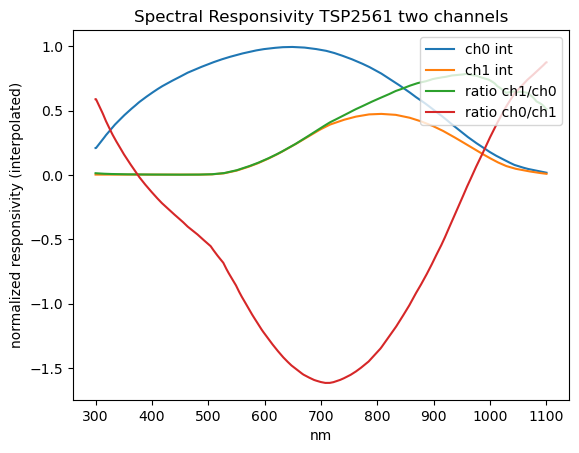

In [94]:
plt.plot(x, ch0i, label='ch0 int')
plt.plot(x, ch1i, label='ch1 int')
plt.plot(x, cr, label='ratio ch1/ch0')
plt.plot(x, cri, label='ratio ch0/ch1')
plt.legend(loc="upper right")
plt.xlabel('nm')
plt.ylabel('normalized responsivity (interpolated)')
plt.title('Spectral Responsivity TSP2561 two channels')

## Human eye

Let's now compare this with the responsivity of the human eye. Data is available here:

- <https://www.gigahertz-optik.com/en-us/service-and-support/knowledge-base/basics-light-measurement/light-color/spectr-sens-eye/>
- <https://en.wikipedia.org/wiki/Spectral_sensitivity>

Again, using the WebPlotDigitizer, we get usable approximations:

In [95]:
her=[(351.4, 0.00513618677042782),
(365.2, 0.00513618677042782),
(379.57510775862073, 0.005609403773357835),
(395.79168299373043, 0.007958821896517643),
(409.26676245210723, 0.013044144558051363),
(421.384375, 0.01757761542223757),
(433.6707974137931, 0.025068212410676693),
(445.9572198275862, 0.038274563609371315),
(460.7749492900608, 0.06230156036653178),
(470.62752437817977, 0.09540946213759227),
(480.3150950395704, 0.1443985148460405),
(487.7658579916123, 0.19959016442982636),
(493.328573627727, 0.24696339236083542),
(497.49617456896556, 0.2835169931571182),
(501.7208153735632, 0.3338144309279565),
(505.2951364942529, 0.37854466359556904),
(508.3053142014518, 0.42733041445691244),
(511.3399089265851, 0.4791660865437747),
(514.7472477865798, 0.5411856281345079),
(517.6985129310345, 0.6029023659376539),
(520.9927801724139, 0.6798081309539783),
(524.2336206896551, 0.7521870387763318),
(526.280436236623, 0.7978956105221625),
(528.3951508620689, 0.832790822487589),
(532.0672984279919, 0.8905112561595147),
(537.1627155172414, 0.9418218334898699),
(540.1, 0.9663813229571985),
(543.8949353448276, 0.9839763719513768),
(546.4, 0.9937743190661479),
(550.5266163793103, 1.003810224070844),
(554.2, 1.008715953307393),
(558.9130387931034, 1.0084900905891978),
(563.8, 1.002490272373541),
(567.4000000000001, 0.9912840466926072),
(570.0104525862068, 0.9781079296927413),
(577.937176724138, 0.9244707723959034),
(583.2877155172414, 0.8710364953709917),
(587.6474137931034, 0.8189730309942307),
(591.610775862069, 0.7665805715819134),
(595.3759698275862, 0.7135301220984839),
(598.9429956896552, 0.6616220164885133),
(602.5100215517241, 0.6094397483489125),
(606.077047413793, 0.5581713553080788),
(609.6440732758621, 0.5083651624252725),
(613.4092672413793, 0.45773648195357575),
(617.5707974137931, 0.4055459058585317),
(622.1286637931034, 0.35252661120801465),
(627.0828663793104, 0.30019847454303383),
(632.6315732758621, 0.24761831924504674),
(638.9729525862069, 0.19570161245767603),
(646.3051724137931, 0.1451911981752314),
(655.6190732758621, 0.09434928018048905),
(663.9467438155923, 0.05988493107531845),
(671.0999556288033, 0.03568665598535126),
(678.8025472303742, 0.01859756602367746),
(686.0367212914771, 0.008483958593348273),
(690.1, 0.00638132295719851),
(700, 0.0038910505836573517),
(716.2, 0.0038910505836573517),
(731.2, 0.0038910505836573517)]

In [96]:
her_x, her_y = np.array([c[0] for c in her]), np.array([c[1] for c in her])

In [97]:
heri=np.interp(x,her_x,her_y)

In [98]:
def ex(p,v):
    return (p[v][0]+p[v][1])/2

In [99]:
def ch_rc(ch):
    # print(ch)
    r1=math.log(ch)
    # print(r1)
    r2=math.log(ch+1)
    # print(r2)
    return r2
    
def ch_rn(ch):
    return ch_rc(ch)/ch_rc(65535.0)

def eval_st(ch0,ch1,a,b,c,d,e,f,g,ren):
    ch0=ch_rn(ch0)
    ch1=ch_rn(ch1)
    # cr=ch1/ch0
    # cri=ch0/(ch1+0.004)/133.5
    # print(ch0, ch1, cr, cri)
    print(ch0, ch1, a*ch0,b*ch1,f*ch1/ch0)
    chtr=(a*ch0+b*ch1-f*ch1/ch0)*(c*ch1+d*ch0)
    print(chtr)
    if chtr<0:
        chtr=0
    chtr=math.pow(chtr,e)/ren
    print(chtr)
    if chtr<0:
        chtr=0
    return chtr

In [100]:
    
def eval_fct(p, ret_val=False):
    a=ex(p,'a'); b=ex(p,'b'); c=ex(p,'c'); d=ex(p,'d'); e=ex(p,'e'); f=ex(p, 'f'); g=ex(p, 'g')
    ch_tr0=(a*ch0i+b*ch1i - f*ch1i/ch0i)*(c*ch1i+d*ch0i)
    ch_tr=[x if x>0 else 0 for x in ch_tr0]
    ch_tr=np.power(ch_tr,e)
    mx= np.max(ch_tr)
    mn = np.min(ch_tr)
    # print(mx,mn)
    if mx!=mn: 
        ch_tr=(ch_tr+mn)/(mx-mn)
    dx=np.sum(np.abs(heri-ch_tr))
    if ret_val is True:
        return ch_tr, dx, mx
    else:
        return dx

In [101]:
def param_search(pi, ef, max_iter=1000):
    opi = pi.copy()
    er = ef(opi)
    bopi=opi.copy()
    for n in range(1000):
        for p in pi:
            tpi=bopi.copy()
            a=tpi[p][0]; b=tpi[p][1];
            ab2=(a+b)/2;
            dx=b-a
            tpi[p][0]=ab2
            eri1=ef(tpi)
            tpi[p][0]=a
            tpi[p][1]=ab2
            eri2=ef(tpi)
            tpi[p][1]=b
            if eri1>er and eri2>er:
                # print(f'{p} is not converging at {ab2}: opt {bopi} er={er}, er1={eri1}, er2={eri2}')
                tpi[p][0] += dx/2
                tpi[p][0] -= dx/2
            if eri1<er and eri2<er:
                print(f'{p} is converging to both sides?!')
                # tpi[p][0] -= dx/2
                # tpi[p][0] += dx/2
            if eri1<er:
                er=eri1
                tpi[p][0]=ab2
            else:
                er=eri2
                tpi[p][1]=ab2
            bopi=tpi.copy()
            # print(bopi, er)
    return bopi, er


In [102]:
params={'a': [0,2], 'b':[0,2], 'c':[0,2], 'd':[0,5], 'e':[5,20], 'f':[0.,10], 'g':[-0.01,0.01]}

In [103]:
pbest, erbest = param_search(params, eval_fct)

a is converging to both sides?!
b is converging to both sides?!
f is converging to both sides?!
b is converging to both sides?!
d is converging to both sides?!
c is converging to both sides?!
a is converging to both sides?!
f is converging to both sides?!
a is converging to both sides?!


Params a=1.0039672851602521, b=1.3320350646973438, c=1.0781250000000022, d=1.6796874999999933, e=8.75, f=3.32714834684192, g=-0.009999999999999998
Renorm: 16.823691072872524


Text(0.5, 1.0, 'Spectral Responsivity TSP2561 two channels compared to human eye d=12.254889658155069')

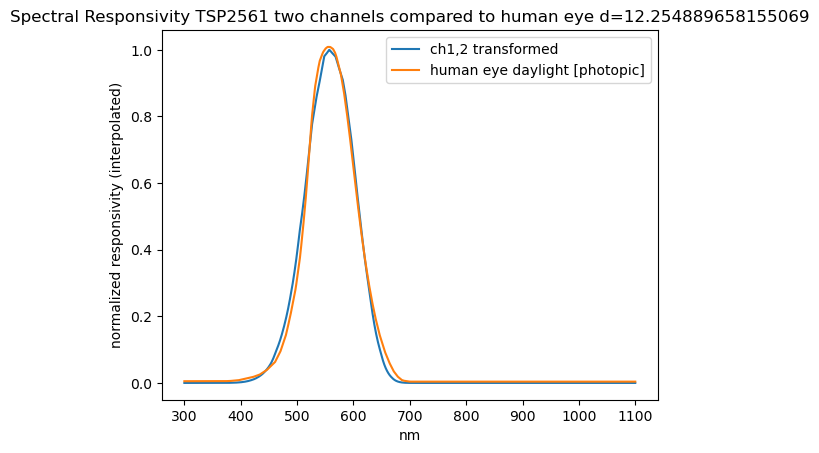

In [104]:
a=ex(pbest,'a'); b=ex(pbest,'b'); c=ex(pbest,'c'); d=ex(pbest,'d'); e=ex(pbest,'e'); f=ex(pbest, 'f'); g=ex(pbest, 'g')
print(f"Params a={a}, b={b}, c={c}, d={d}, e={e}, f={f}, g={g}")
# a=3; b=2; c=2.2; d=3.36; e=4
ch_tr, dx, ren = eval_fct(pbest, True) # eval_model(a,b,c,d,e)
print(f"Renorm: {ren}")
plt.plot(x, ch_tr, label='ch1,2 transformed')
plt.plot(x, heri, label='human eye daylight [photopic]')
plt.legend(loc="upper right")
plt.xlabel('nm')
plt.ylabel('normalized responsivity (interpolated)')
plt.title(f'Spectral Responsivity TSP2561 two channels compared to human eye d={dx}')

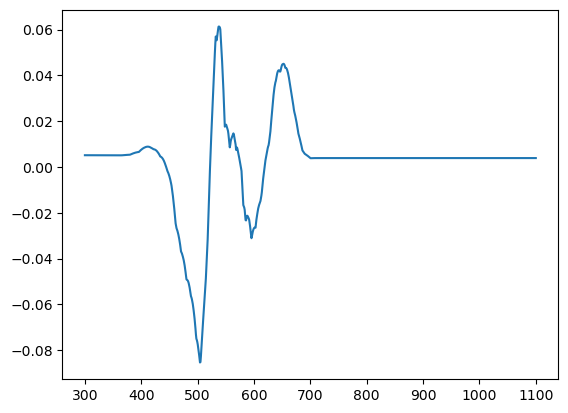

In [105]:
plt.plot(x,heri-ch_tr, label='error')

In [106]:
a, b, c, d, e,f

(1.0039672851602521,
 1.3320350646973438,
 1.0781250000000022,
 1.6796874999999933,
 8.75,
 3.32714834684192)

In [107]:
eval_st(85.0/65535.0,14.0/65635.0,a,b,c,d,e,f,g,ren)

0.00011687420956538278 1.923095221906042e-05 0.00011733788288260773 2.5616302683307675e-05 0.5474623624987874
-0.00011879322516776154
0.0


0.0

This all would be useful and intersting, if the frequency of the measured light was fixed and known. Alas, that is not the case.

## Looking at a way to deduce an approximation of main frequencies using sensor ratios

Text(0.5, 1.0, 'Spectral Responsivity TSP2561 two channels compared to human eye')

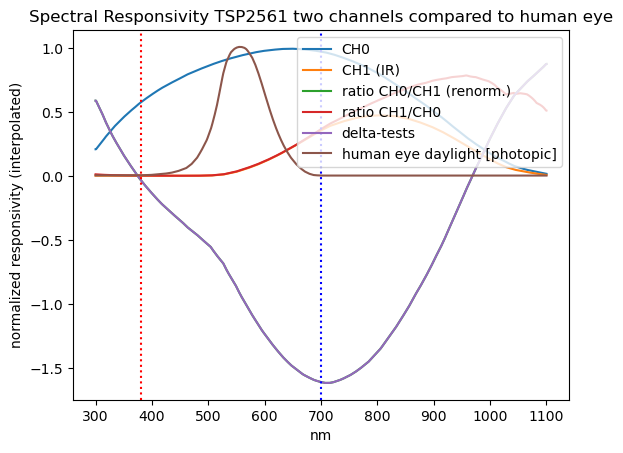

In [108]:
plt.plot(x, ch0i, label='CH0')
plt.plot(x, ch1i, label='CH1 (IR)')
plt.plot(x, cri, label='ratio CH0/CH1 (renorm.)')
plt.plot(x, cr, label='ratio CH1/CH0')
plt.plot(x, cri,label='delta-tests')
plt.axvline(x = 380, color = 'r', linestyle=':')
plt.axvline(x = 700, color = 'b', linestyle=':')
    
plt.plot(x, heri, label='human eye daylight [photopic]')
plt.legend(loc="upper right")
plt.xlabel('nm')
plt.ylabel('normalized responsivity (interpolated)')
plt.title(f'Spectral Responsivity TSP2561 two channels compared to human eye')

Now we have two indicator lines:

- If the ratio $\frac{CH1}{CH0}>0.5$, then light is mostly IR > 700nm, invisible to human eye.
- If the ratio $\frac{CH0}{CH1}^{renormalized}>0$ (and it's not (1) IR), then light is mostly UV < 380nm, invisible to human eye.
- for the remainding range between 380nm and 700nm, the renormalized $CH0/CH1$ gives a near-linear indication of the frequency-maximum.